In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:/Users/user/Downloads/EDA Practising/onlinefoods.csv')

In [6]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [9]:
# some columns like Unnamed: 12, pincode, are does not need in this case so dropping the columns needs to be done.

df.drop(['Unnamed: 12', 'Pin code'], axis = 1, inplace = True)

In [10]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,Yes,Positive


In [11]:
# checking data for making EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Output                      388 non-null    object 
 10  Feedback                    388 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 33.5+ KB


In [13]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Output                        0
Feedback                      0
dtype: int64

In [14]:
# renaming columns before further processing
df.rename(columns = {'Age': 'age', 'Gender':'gender','Marital Status':'relationship','Occupation':'work','Monthly Income':'income','Educational Qualifications':'degree','Family size':'members', 'Output':'output', 'Feedback':'feedback'}, inplace=True)

In [15]:
df.head()

,age,gender,relationship,work,income,degree,members,latitude,longitude,output,feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,Yes,Positive


In [16]:
# correcting income datatype

df['income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [17]:
# making correction

income_map = {
    'No Income':0,
    'Below Rs.10000':1,
    'More than 50000':2,
    '10001 to 25000':3,
    '25001 to 50000':4
}

df['income']=df['income'].replace(income_map).infer_objects(copy=False)

In [18]:
df.head()

,age,gender,relationship,work,income,degree,members,latitude,longitude,output,feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,Yes,Positive
1,24,Female,Single,Student,1,Graduate,3,12.9770,77.5773,Yes,Positive
2,22,Male,Single,Student,1,Post Graduate,3,12.9551,77.6593,Yes,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,Yes,Positive
4,22,Male,Single,Student,1,Post Graduate,4,12.9850,77.5533,Yes,Positive


In [19]:
df.describe()

,age,income,members,latitude,longitude
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,1.443299,3.280928,12.972058,77.600160
std,2.975593,1.586240,1.351025,0.044489,0.051354
min,18.000000,0.000000,1.000000,12.865200,77.484200
25%,23.000000,0.000000,2.000000,12.936900,77.565275
50%,24.000000,1.000000,3.000000,12.977000,77.592100
75%,26.000000,3.000000,4.000000,12.997025,77.630900
max,33.000000,4.000000,6.000000,13.102000,77.758200


<Axes: ylabel='Density'>

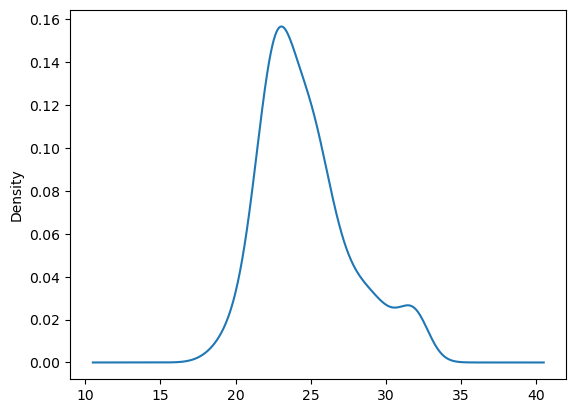

In [21]:
# making visulization to see the age groups which made the highest numbers of order food online

df['age'].plot(kind='kde')

<Axes: title={'center': 'Age vs Income'}, xlabel='age', ylabel='income'>

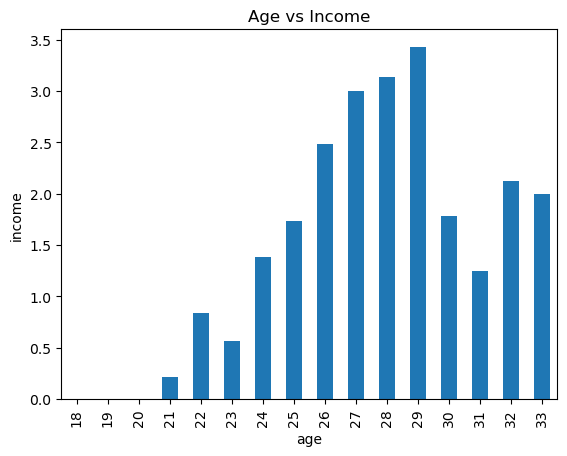

In [22]:
# avg income by age

avg_income = df.groupby('age').income.mean()

avg_income.plot(kind='bar', ylabel='income',title='Age vs Income')

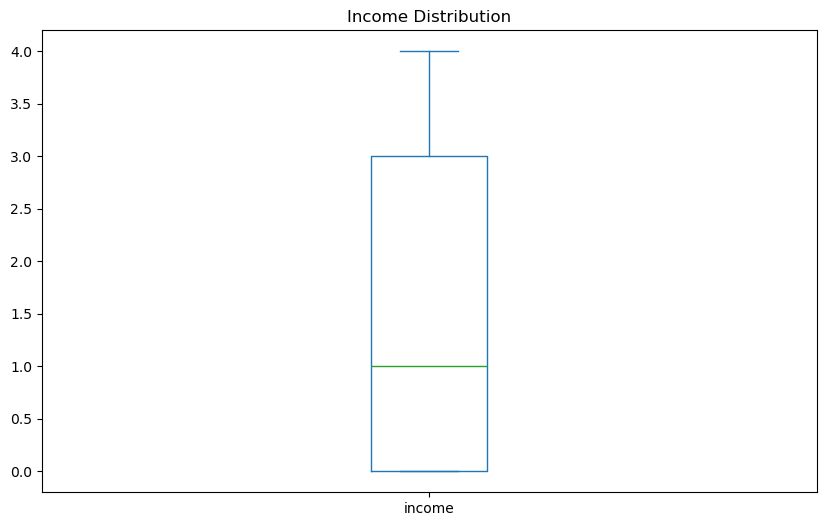

In [30]:
plt.figure(figsize=(10,6))
df['income'].plot(kind='box',title='Income Distribution')
plt.show()

<Axes: xlabel='income'>

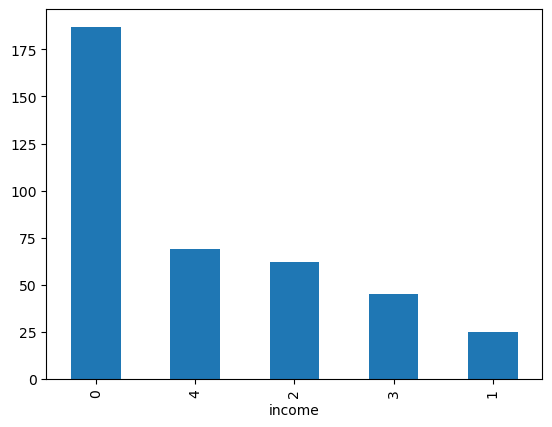

In [31]:
df['income'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

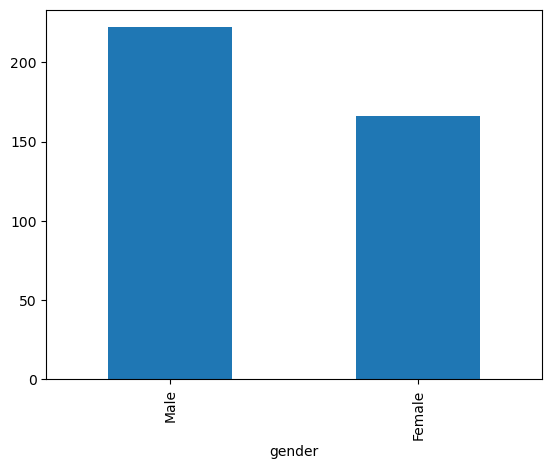

In [32]:
# checking ordering gender wise

df['gender'].value_counts().plot(kind= 'bar')

it can be seen that the males are more ordering online food than female

In [37]:
# gender vs income

avg_income = df.groupby('gender').income.mean()
avg_income

gender
Female    1.403614
Male      1.472973
Name: income, dtype: float64

<Axes: xlabel='gender'>

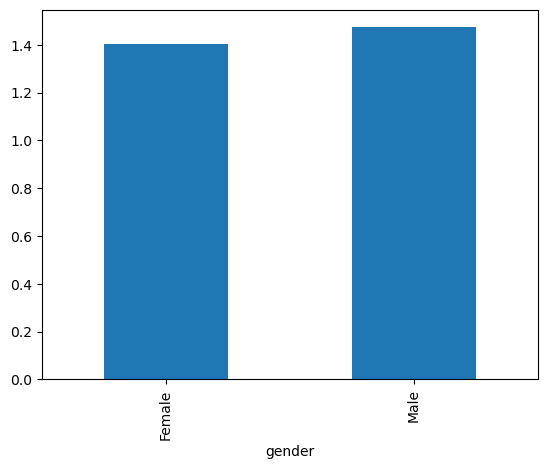

In [38]:
avg_income.plot(kind='bar')

In [39]:
# counting woking professionals

df['work'].value_counts()

work
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64

In [42]:
work_by_gender = df.groupby('gender').work
work_by_gender.value_counts()

gender  work          
Female  Student            92
        Employee           49
        Self Employeed     16
        House wife          9
Male    Student           115
        Employee           69
        Self Employeed     38
Name: count, dtype: int64

<Axes: xlabel='gender,work'>

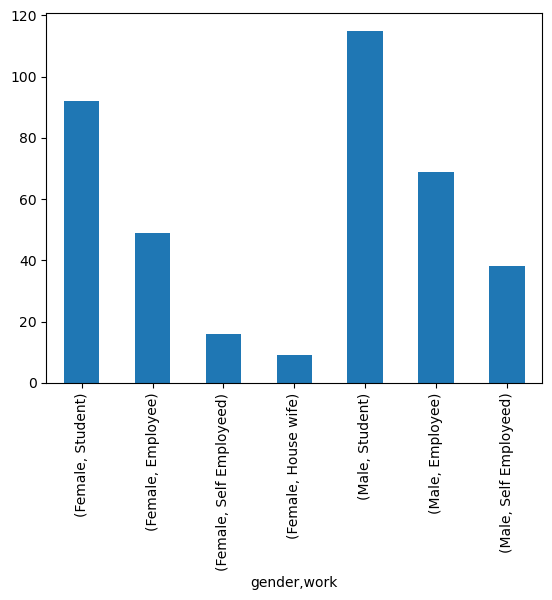

In [43]:
work_by_gender.value_counts().plot(kind='bar')

In [44]:
# checking relationships

df['degree'].value_counts()

degree
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

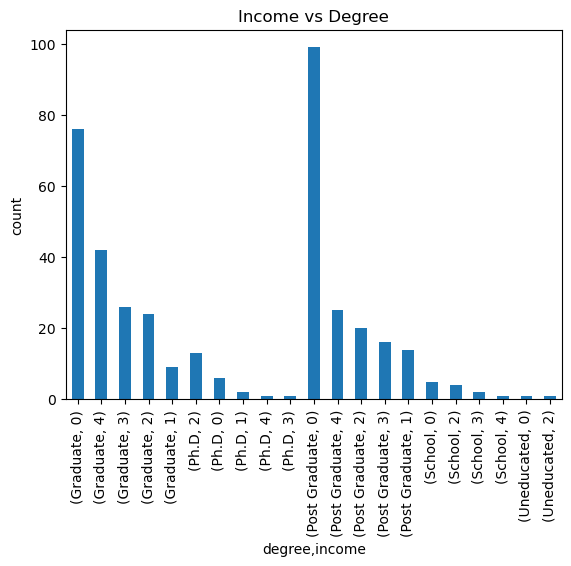

In [45]:
degree_by_income=df.groupby('degree').income
degree_by_income.value_counts().plot(kind='bar', ylabel='count', title='Income vs Degree')
plt.show()

<Axes: title={'center': 'Gender vs Degree'}, xlabel='degree,gender', ylabel='count'>

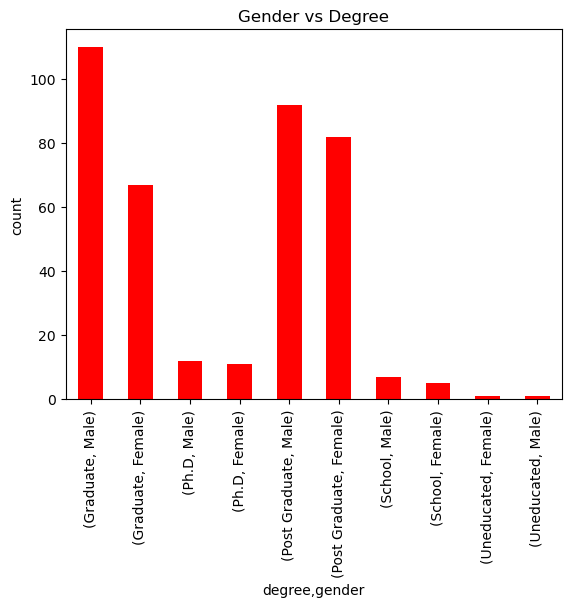

In [46]:
# gender vs degree

degree_by_gender = df.groupby('degree').gender
degree_by_gender.value_counts().plot(kind='bar', ylabel='count', title='Gender vs Degree',color='r')

In [48]:
highest_earners = df.groupby(['degree', 'gender'])['income'].agg('mean').reset_index().sort_values(by='income')
print(highest_earners)

          degree  gender    income
6         School  Female  0.000000
8     Uneducated  Female  0.000000
2           Ph.D  Female  0.909091
5  Post Graduate    Male  1.021739
4  Post Graduate  Female  1.317073
1       Graduate    Male  1.709091
0       Graduate  Female  1.716418
9     Uneducated    Male  2.000000
3           Ph.D    Male  2.083333
7         School    Male  2.571429


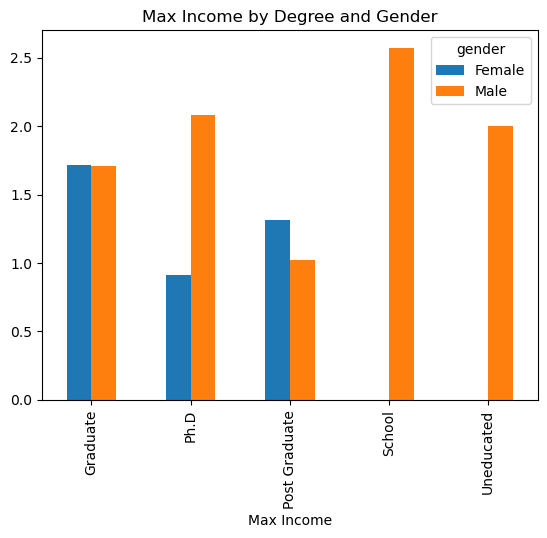

In [49]:
highest_earners.pivot(index='degree', columns='gender',values='income').plot(kind='bar')
plt.xlabel('Max Income')
plt.title('Max Income by Degree and Gender')
plt.show()

<Axes: xlabel='output'>

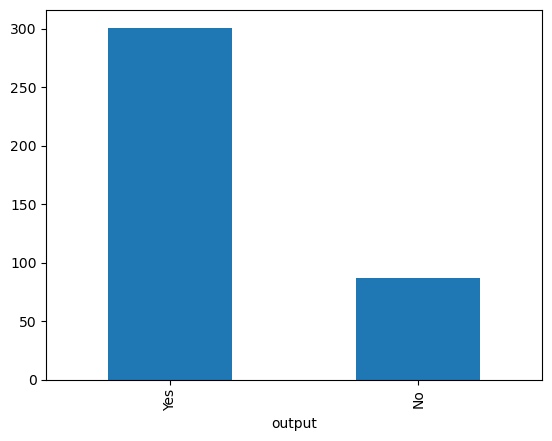

In [50]:
df['output'].value_counts().plot(kind='bar')

<Axes: xlabel='feedback'>

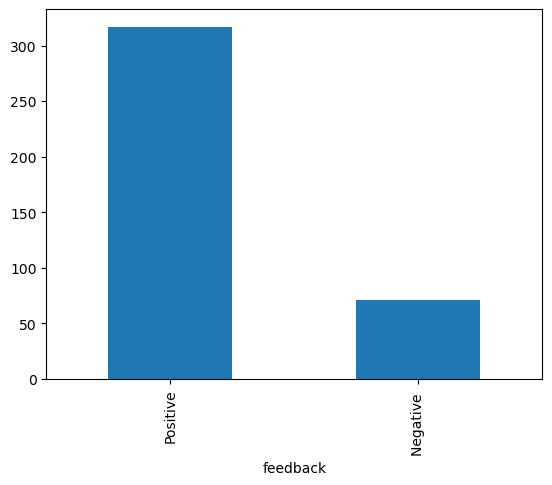

In [51]:
df['feedback'].value_counts().plot(kind='bar')

<Axes: >

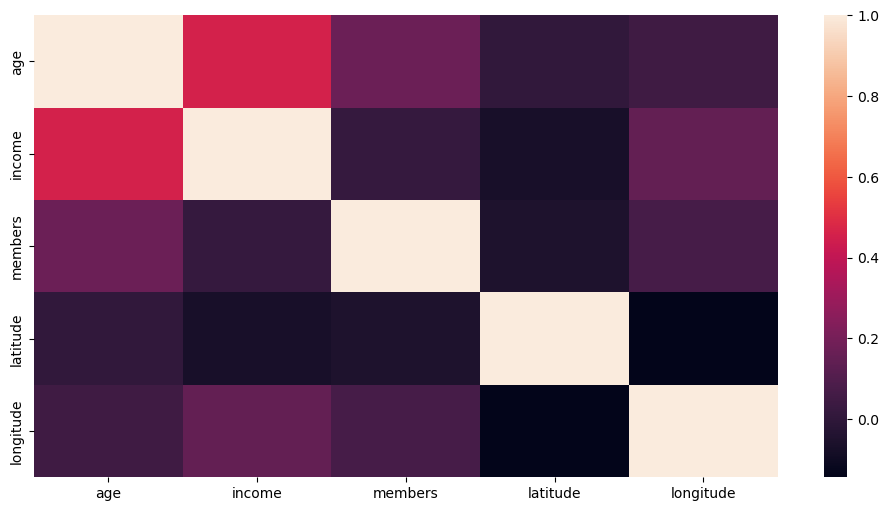

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes([int,'float']).corr())

In [55]:
# adding gender as male or female 

df['gender'] = df['gender'].astype('category')
df = pd.get_dummies(df, columns=['gender'], prefix='gender')

In [56]:
df

,age,relationship,work,income,degree,members,latitude,longitude,output,feedback,gender_Female,gender_Male
0,20,Single,Student,0,Post Graduate,4,12.9766,77.5993,Yes,Positive,True,False
1,24,Single,Student,1,Graduate,3,12.9770,77.5773,Yes,Positive,True,False
2,22,Single,Student,1,Post Graduate,3,12.9551,77.6593,Yes,Negative,False,True
3,22,Single,Student,0,Graduate,6,12.9473,77.5616,Yes,Positive,True,False
4,22,Single,Student,1,Post Graduate,4,12.9850,77.5533,Yes,Positive,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Single,Student,0,Post Graduate,2,12.9766,77.5993,Yes,Positive,True,False
384,23,Single,Student,0,Post Graduate,4,12.9854,77.7081,Yes,Positive,True,False
385,22,Single,Student,0,Post Graduate,5,12.9850,77.5533,Yes,Positive,True,False
386,23,Single,Student,1,Post Graduate,2,12.9770,77.5773,Yes,Positive,False,True
